<a href="https://colab.research.google.com/github/daniilomendes/regressao/blob/main/Regess%C3%A3oLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Regressão Linear Simples

In [ ]:
#importando bibliotecas, sklearn para criar modelos de regressão e yellowbrick para visualização de residuais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#importando base de dados
base = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/22.Prática em Python/dados/cars.csv')
base.shape

(50, 3)

In [ ]:
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [ ]:
base = base.drop(['Unnamed: 0'], axis = 1)
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [ ]:
#definição das variaveis, x distancia e variavel independente, y velocidade e variavel dependente
x = base.iloc[:, 1].values
y = base.iloc[:, 0].values
x

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85])

In [ ]:
#calculo da correlação entre x e y
correlacao = np.corrcoef(x, y)
correlacao

#formato de matriz com uma coluna a mais
x = x.reshape(-1, 1)

In [ ]:
#criação do modelo e treinamento(fit indica que o treinamento deve ser executado)
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#visualização do coeficiente
modelo.intercept_

8.283905641787172

In [ ]:
#inclinação
modelo.coef_

array([0.16556757])

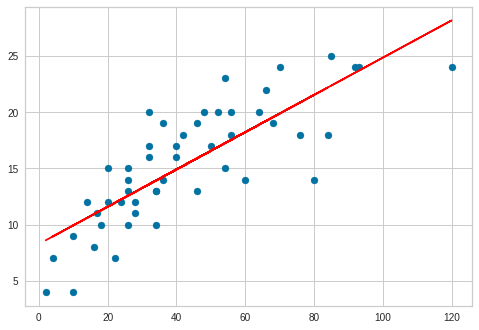

In [ ]:
#geração do grafico com os elementos reais e as previsoes
plt.scatter(x, y)
plt.plot(x, modelo.predict(x), color = 'red')

In [ ]:
#previsao da distancia de 22 pés usando formula manual
#interceptação *inclinação* valor de dist
#qual velocidade se levou 22 pés para parar
modelo.intercept_ + modelo.coef_ * 22

array([11.92639228])

In [ ]:
#previsão utilizando função do sklearn
modelo.predict([[22]])

array([11.92639228])

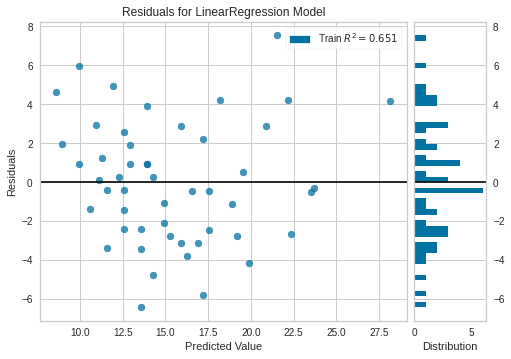

In [ ]:
#grafico para visualizar os residuos
visualizador = ResidualsPlot(modelo)
visualizador.fit(x, y)
visualizador.poof()

Regressão Multipla

In [ ]:
#importando biblioteca
import statsmodels.formula.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#base de dados
base = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/22.Prática em Python/dados/mt_cars.csv')
base.shape

(32, 12)

In [ ]:
base.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [ ]:
#Excluir coluna
base = base.drop(['Unnamed: 0'], axis = 1)

In [ ]:
#craição de x e y
#calculo de correção
x = base.iloc[:, 2].values #coluna disp
y = base.iloc[:, 0].values #mpg
correlacao = np.corrcoef(x, y)
correlacao

array([[ 1.        , -0.84755138],
       [-0.84755138,  1.        ]])

In [ ]:
#mudança de formato de x para o formato de matriz(necessario para versoes mais recentes do sklearn)
x = x.reshape(-1, 1)

In [ ]:
#criação de modelo, treinamento, visualização dos coeficienter e do score do modelo
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Intenceptação
modelo.intercept_

29.599854756163946

In [ ]:
#inclinação
modelo.coef_

array([-0.04121512])

In [ ]:
#score R^2
modelo.score(x, y)

0.7183433404897299

In [ ]:
#geração de previsoes
previsoes = modelo.predict(x)
previsoes

array([23.00543556, 23.00543556, 25.1486218 , 18.96635381, 14.76241157,
       20.32645276, 14.76241157, 23.55359666, 23.79676587, 22.69220065,
       22.69220065, 18.23272467, 18.23272467, 18.23272467, 10.14631813,
       10.64089957, 11.46520197, 26.35622482, 26.47987017, 26.66945973,
       24.64991885, 16.49344661, 17.07045829, 15.17456277, 13.11380677,
       26.34386028, 24.64167582, 25.68029685, 15.13334765, 23.62366236,
       17.19410365, 24.61282524])

In [ ]:
#criação do modelo, utilizando a biblioteca statsmodel
#podemos ver r ajustando r2
modelo_ajustado = sm.ols(formula = 'mpg ~ disp', data = base)
modelo_treinado = modelo_ajustado.fit()
modelo_treinado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     76.51
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           9.38e-10
Time:                        13:01:29   Log-Likelihood:                -82.105
No. Observations:                  32   AIC:                             168.2
Df Residuals:                      30   BIC:                             171.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.5999      1.230     24.070      0.000      27.088      32.111
disp          -0.0412      0.005     -8.747      0.000      -0.051      -0.032
==============================================================================
Omnibus:                        3.368   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.186   Jarque-Bera (JB):                3.049
Skew:                           0.719   Prob(JB):                        0.218
Kurtosis:                       2.532   Cond. No.                         558.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

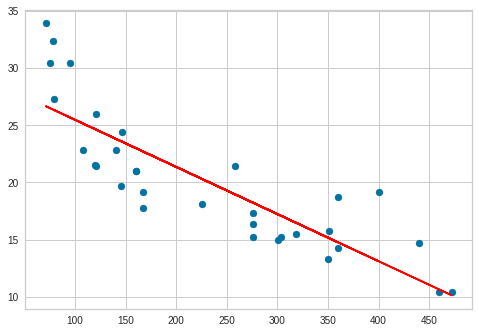

In [ ]:
#visualização dos resultados
plt.scatter(x, y)
plt.plot(x, previsoes, color = 'red')

In [ ]:
#previsao para somente um valor
modelo.predict([[200]])

array([21.35683076])

In [ ]:
#criação de novas variaveis x1 e y1 e novo modelo para comparação com o anterior
#3 variaveis dependentes para prever mpg: cyl - disp - hp
x1 = base.iloc[:, 1:4].values
x1

array([[  6. , 160. , 110. ],
       [  6. , 160. , 110. ],
       [  4. , 108. ,  93. ],
       [  6. , 258. , 110. ],
       [  8. , 360. , 175. ],
       [  6. , 225. , 105. ],
       [  8. , 360. , 245. ],
       [  4. , 146.7,  62. ],
       [  4. , 140.8,  95. ],
       [  6. , 167.6, 123. ],
       [  6. , 167.6, 123. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 275.8, 180. ],
       [  8. , 472. , 205. ],
       [  8. , 460. , 215. ],
       [  8. , 440. , 230. ],
       [  4. ,  78.7,  66. ],
       [  4. ,  75.7,  52. ],
       [  4. ,  71.1,  65. ],
       [  4. , 120.1,  97. ],
       [  8. , 318. , 150. ],
       [  8. , 304. , 150. ],
       [  8. , 350. , 245. ],
       [  8. , 400. , 175. ],
       [  4. ,  79. ,  66. ],
       [  4. , 120.3,  91. ],
       [  4. ,  95.1, 113. ],
       [  8. , 351. , 264. ],
       [  6. , 145. , 175. ],
       [  8. , 301. , 335. ],
       [  4. , 121. , 109. ]])

In [ ]:
y1 = base.iloc[:, 0].values
modelo2 = LinearRegression()
modelo2.fit(x1, y1)
#R2
modelo2.score(x1, y1)

0.7678877440928638

In [ ]:
#criação do modelo ajustado com mais atributos(regressão linear multipla)
modelo_ajustado2 = sm.ols(formula = 'mpg ~ cyl + disp + hp', data = base)
modelo_treinado2 = modelo_ajustado2.fit()
modelo_treinado2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     30.88
Date:                Mon, 13 Sep 2021   Prob (F-statistic):           5.05e-09
Time:                        13:02:31   Log-Likelihood:                -79.009
No. Observations:                  32   AIC:                             166.0
Df Residuals:                      28   BIC:                             171.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.1849      2.591     13.195      0.000      28.878      39.492
cyl           -1.2274      0.797     -1.540      0.135      -2.861       0.406
disp          -0.0188      0.010     -1.811      0.081      -0.040       0.002
hp            -0.0147      0.015     -1.002      0.325      -0.045       0.015
==============================================================================
Omnibus:                        2.942   Durbin-Watson:                   1.606
Prob(Omnibus):                  0.230   Jarque-Bera (JB):                2.558
Skew:                           0.675   Prob(JB):                        0.278
Kurtosis:                       2.692   Cond. No.                     1.51e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#previsão de um novo registro
novo = np.array([4, 200, 100])
novo = novo.reshape(1, -1)
modelo2.predict(novo)

array([24.03968887])

In [ ]:
#Importando base de dados
base = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/22.Prática em Python/dados/slr12.csv', sep = ';')
base.shape

(36, 2)

In [ ]:
base.head()

,FrqAnual,CusInic
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [ ]:
#definindo as variaveis dependentes(y = CusInic) e independentes(x = FrqAnual)
x = base.iloc[:, 0].values
y = base.iloc[:, 1].values
x

array([1000, 1125, 1087, 1070, 1100, 1150, 1250, 1150, 1100, 1350, 1275,
       1375, 1175, 1200, 1175, 1300, 1260, 1330, 1325, 1200, 1225, 1090,
       1075, 1080, 1080, 1180, 1225, 1175, 1250, 1250,  750, 1125,  700,
        900,  900,  850])

In [ ]:
#calculo da correlação
correlacao = np.corrcoef(x, y)
correlacao

array([[1.        , 0.47700725],
       [0.47700725, 1.        ]])

In [ ]:
#formatando matriz para ter uma coluna a mais
x = x.reshape(-1, 1)

#criando o modelo de treinamento
modelo = LinearRegression()
modelo.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#visualizando o coefiente
modelo.intercept_

867.6042222620559

In [ ]:
#visualizando a inclinação
modelo.coef_

array([0.37315794])

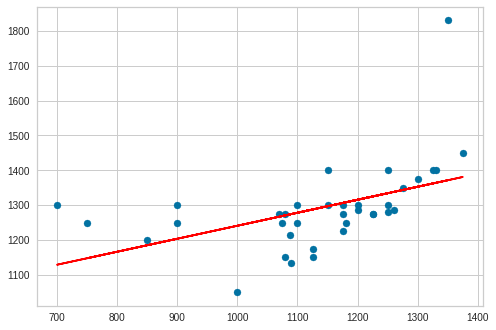

In [ ]:
#gerando grafico com os modelos reais e previsões
plt.scatter(x, y)
plt.plot(x, modelo.predict(x),  color = 'red')

In [ ]:
#Realizando a previsão
modelo.predict([[1000]])

array([1240.76215819])

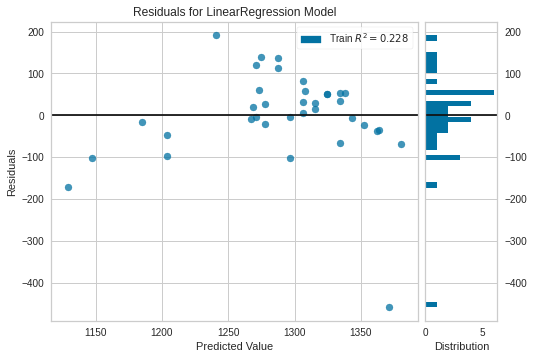

In [ ]:
#Grafico com a visualização dos residuos
visualizador = ResidualsPlot(modelo)
visualizador.fit(x, y)
visualizador.poof()

Regressão Logistica

In [ ]:
#importando bibliotecas
from sklearn.linear_model import LogisticRegression

,SITUACAO,DESPESAS
count,47.000000,47.000000
mean,0.510638,1085.744681
std,0.505291,870.968338
min,0.000000,10.000000
25%,0.000000,300.000000
50%,1.000000,800.000000
75%,1.000000,1700.000000
max,1.000000,3300.000000


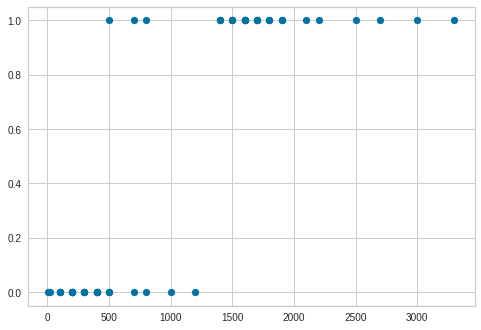

In [ ]:
#base de dados, visualizando grafico com os pontos e visualizando a estatistica
base = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/25.Prática em Python/dados/Eleicao.csv', sep = ';')
plt.scatter(base.DESPESAS, base.SITUACAO)
base.describe()

In [ ]:
#visualizando o coeficiente de correlação entre os dois atributos
np.corrcoef(base.DESPESAS, base.SITUACAO)

array([[1.        , 0.81218717],
       [0.81218717, 1.        ]])

In [ ]:
#criação das variaveis dependentes e independentes
x = base.iloc[:, 2].values
x = x[:, np.newaxis]
y = base.iloc[:, 1].values
x

array([[  10],
       [ 100],
       [1600],
       [1500],
       [3300],
       [ 200],
       [1800],
       [1700],
       [ 300],
       [1800],
       [ 100],
       [ 500],
       [3000],
       [  20],
       [ 200],
       [ 700],
       [1600],
       [1900],
       [ 100],
       [ 400],
       [2700],
       [ 200],
       [ 300],
       [ 500],
       [2500],
       [1400],
       [ 700],
       [1700],
       [1400],
       [1600],
       [ 400],
       [ 200],
       [1600],
       [2200],
       [1900],
       [ 200],
       [1200],
       [1700],
       [1500],
       [2100],
       [ 400],
       [ 800],
       [ 400],
       [ 500],
       [1000],
       [ 300],
       [ 800]])

In [ ]:
#criação do modelo, treinamento e visualizando os coeficientes
modelo = LogisticRegression()
modelo.fit(x, y)
modelo.coef_
modelo.intercept_

array([-4.60287217])

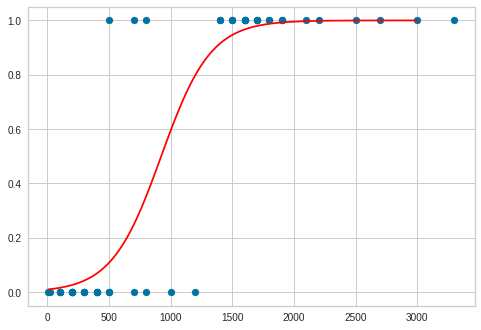

In [ ]:
plt.scatter(x, y)

#Geração de novos dados para gerar a função sigmoide
x_teste = np.linspace(10, 3000, 100)

#implementação da função sigmoid
def model(x):
	return 1 / (1 + np.exp(-x))

#geração das previsoes(variavel r) e visualizando os resultados
r = model(x_teste * modelo.coef_ + modelo.intercept_).ravel()
plt.plot(x_teste, r, color = 'red')

In [ ]:
#carregamento da base de dados com os novos candidatos
base_previsoes = pd.read_csv('/content/drive/MyDrive/FormaçãoCD2/25.Prática em Python/dados/NovosCandidatos.csv', sep = ';')
base_previsoes

,CANDIDATO,DESPESAS
0,A,0
1,B,10
2,C,200
3,D,500
4,E,900
5,F,1500
6,G,3000


In [ ]:
#mudança dos dados para formato de matriz
despesas = base_previsoes.iloc[:, 1].values
despesas = despesas.reshape(-1, 1)

In [ ]:
#previsoes e geração de nva base de dados com os valores originais e as previsões
previsoes_teste = modelo.predict(despesas)
previsoes_teste

array([0, 0, 0, 0, 0, 1, 1])

In [ ]:
base_previsoes = np.column_stack((base_previsoes, previsoes_teste))
base_previsoes

array([['A', 0, 0],
       ['B', 10, 0],
       ['C', 200, 0],
       ['D', 500, 0],
       ['E', 900, 0],
       ['F', 1500, 1],
       ['G', 3000, 1]], dtype=object)